<h2>Convolutional Layers</h2>
<p>Convolutional layers are the foundation of convolutional neural networks (CNNs), which excel at tasks like image and video recognition, as well as other data involving spatial patterns. Here’s an in-depth look at its key components:</p>

<h3>Convolution Operation</h3>
<p>The convolution operation involves sliding a filter (or kernel) over the input data, performing element-wise multiplication and summation. This process helps extract important features, such as edges, textures, and patterns.</p>

<h3>Filters (Kernels)</h3>
<p>Filters are small matrices (typically 3x3, 5x5, etc.) applied to the input data to detect specific features, such as edges, corners, or textures. Each filter learns to recognize different patterns, with its values being updated during the training process.</p>

<h3>Stride</h3>
<p>Stride refers to how the filter moves across the input data in terms of rows and columns. For example, with a stride of 1, the filter moves one pixel at a time both horizontally (across columns) and vertically (across rows). With a stride of 2, the filter moves two pixels at a time in both directions, which reduces the size of the output feature map.</p>

<h3>Padding</h3>
<p>Padding involves adding extra pixels, typically zeros, around the input data. This helps control the spatial dimensions of the output feature map and can preserve the size of the input after convolution. Padding is especially useful in deeper networks, where maintaining the input size is crucial for effective processing.</p>

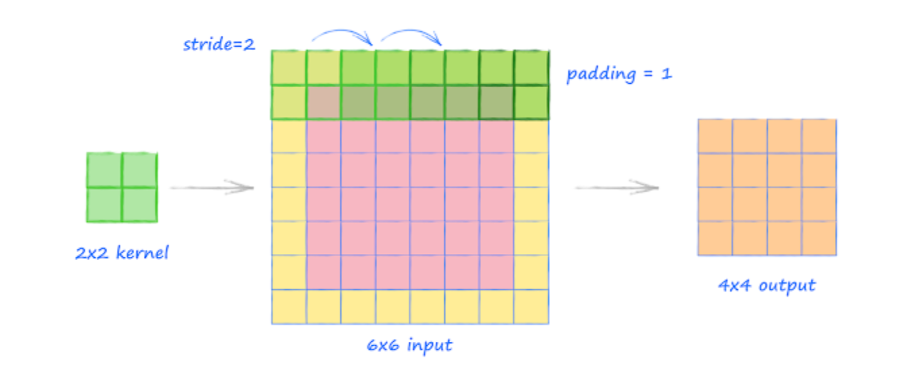

<h3>How Convolution Works in General</h3>
<p>In convolutional layers, each filter (or kernel) slides across the input image, computing dot products between the filter values and the image pixel values in the area the filter covers. This produces an output feature map where each "pixel" represents a feature detected in that region.
</p
>

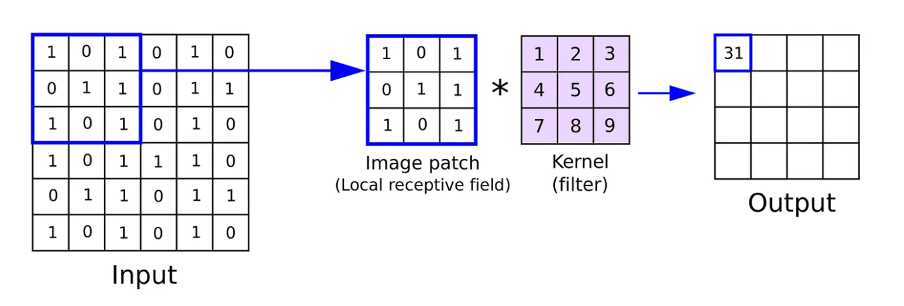

<h2>Convolution in Code</h2>

<h3>Explanation of the Code</h3>

<h4>Class Initialization:</h4>
<ul>
  <li>The <code>__init__</code> method initializes the convolutional layer with the specified parameters: number of filters, kernel size, stride, and padding type.</li>
</ul>

<h4>Kernel Initialization:</h4>
<ul>
  <li>The <code>initialize_kernels</code> method initializes the convolutional kernels with random values. These kernels are used to scan the input image and extract features. The number of input channels is required to determine the shape of the kernels.</li>
</ul>

<h4>Padding Application:</h4>
<ul>
  <li>The <code>apply_padding</code> method applies zero padding around the image if <code>padding='same'</code> is specified.</li>
</ul>

<h4>Forward Pass (Convolution):</h4>
<ul>
  <li>In the <code>forward</code> method, the input image is padded if necessary, and then we calculate the output dimensions based on the stride and kernel size.</li>
  <li>We iterate over each filter and slide the kernel across the image for each spatial position, calculating the sum of element-wise products for each region covered by the kernel and storing the result in the output.</li>
</ul>


<h4>Example Usage:</h4>
<p>We create a simulated RGB image of shape 227 x 227 x 3 to match the input size of AlexNet. We then initialize a Conv2D layer to represent the first layer of AlexNet, with 96 filters, an 11 x 11 kernel, a stride of 4, and padding to preserve the spatial dimensions. When we apply this layer to the image, the output shape is 55 x 55 x 96, which represents the downsampled feature maps for each of the 96 filters in this layer.</p>

<h4>Key Differences from TensorFlow's Conv2D:</h4>
<p>This code is a simplified version, focusing specifically on mimicking Conv2D functionality with its distinct input size, kernel, stride, and number of filters.</p>

<ul>
  <li>It doesn’t include options for initializing kernels with other distributions or scaling.</li>
  <li>It lacks bias terms and activation functions, which are typically applied in Conv2D layers.</li>
  <li>The code doesn’t support advanced features like weight decay or backpropagation for training.</li>
  <li>This implementation provides a clear view of the convolution mechanics and can be expanded to include more complex features if needed.</li>
</ul>


In [6]:
import numpy as np

class Conv2D:
    def __init__(self, filters, kernel_size, stride=1, padding='valid'):
        '''
        Initializes the Conv2D layer.
        
        Parameters:
        - filters (int): Number of filters to apply.
        - kernel_size (tuple): Size of the kernel (height, width).
        - stride (int): Step size for moving the kernel over the input.
        - padding (str): 'valid' (no padding) or 'same' (padding to keep spatial dimensions).
        '''
        self.filters = filters
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding
        self.kernels = None  # To hold the kernels once initialized

    def initialize_kernels(self, input_channels):
        '''
        Initializes the kernels (filters) for each input channel.
        
        Parameters:
        - input_channels (int): Number of channels in the input image.
        
        This method randomly initializes the kernels with a normal distribution.
        Each kernel has a shape of (filters, kernel_height, kernel_width, input_channels).
        '''
        kernel_height, kernel_width = self.kernel_size
        # Randomly initialize kernels for each filter and input channel
        self.kernels = np.random.randn(self.filters, kernel_height, kernel_width, input_channels)

    def apply_padding(self, image, pad_h, pad_w):
        '''
        Pads the input image with zeros if necessary.
        
        Parameters:
        - image (np.array): The input image.
        - pad_h (int): Height of padding.
        - pad_w (int): Width of padding.
        
        Returns:
        - np.array: The padded image.
        '''
        return np.pad(image, ((pad_h, pad_h), (pad_w, pad_w), (0, 0)), mode='constant', constant_values=0)

    def forward(self, image):
        '''
        Performs the convolution operation on the input image.
        
        Parameters:
        - image (np.array): Input image with shape (height, width, channels).
        
        Returns:
        - np.array: Output of the convolution operation with shape (output_height, output_width, filters).
        '''
        # Initialize the kernels if not done already
        if self.kernels is None:
            self.initialize_kernels(input_channels=image.shape[2])

        # Image dimensions and kernel dimensions
        image_height, image_width, image_channels = image.shape
        kernel_height, kernel_width, _ = self.kernels.shape[1:]
        
        # Calculate padding if needed
        if self.padding == 'same':
            pad_h = (kernel_height - 1) // 2
            pad_w = (kernel_width - 1) // 2
            image = self.apply_padding(image, pad_h, pad_w)
        elif self.padding == 'valid':
            pad_h, pad_w = 0, 0

        # Calculate output dimensions
        output_height = (image.shape[0] - kernel_height) // self.stride + 1
        output_width = (image.shape[1] - kernel_width) // self.stride + 1
        
        # Initialize the output array to store feature maps for each filter
        result = np.zeros((output_height, output_width, self.filters))
        
        # Perform convolution
        for f in range(self.filters):
            # Select the kernel for the current filter
            kernel = self.kernels[f]
            for y in range(output_height):
                for x in range(output_width):
                    # Extract the region of interest for the current location and all channels
                    region = image[
                        y * self.stride : y * self.stride + kernel_height,
                        x * self.stride : x * self.stride + kernel_width,
                        :
                    ]
                    # Apply the filter to the region and sum across channels
                    result[y, x, f] = np.sum(region * kernel)
        
        return result

# Example usage
# Simulated RGB image with dimensions (227, 227, 3)
image = np.random.randn(227, 227,3)

# Instantiate the Conv2D layer with 96 filters, an 11x11 kernel size, stride of 4, and 'same' padding
conv_layer = Conv2D(filters=96, kernel_size=(11, 11), stride=4, padding='valid')

# Apply the convolution layer to the image
output = conv_layer.forward(image)

print("Image shape:\n", image.shape)
print("Output Shape of convolution:\n", output.shape)


Image shape:
 (227, 227, 3)
Output Shape of convolution:
 (55, 55, 96)


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Max Pooling</title>
</head>
<body>
    <h2>Max Pooling</h2>
    <p>
        Max pooling is a technique often incorporated into <strong>Convolutional Neural Network (CNN)</strong> architectures. 
        Its primary function is to reduce the spatial dimensions of the feature maps created by filtering an image. 
        This reduction in size decreases both the number of parameters and the computational complexity of the network, 
        helping to streamline processing.
    </p>
    <h3>Benefits of Max Pooling</h3>
    <p>
        Max pooling serves multiple purposes, it helps prevent overfitting by abstracting the features of the input, 
        reduces the number of parameters that the network needs to learn, and imparts a basic level of translation 
        invariance to the model's internal representation. It achieves this by applying a maximum filter to typically 
        non-overlapping sections of the feature map.
    </p>
    
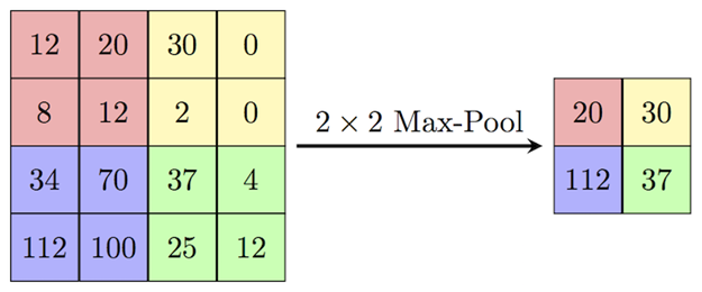

<h3>In AlexNet</h3>
<p>
    In AlexNet, it was chosen to use max pooling windows of size <strong>3x3</strong> with a stride of <strong>2</strong>, 
    allowing some overlap between windows. This configuration of max pooling contributed to a decrease in the 
    top-1 error rate by <strong>0.4%</strong> and the top-5 error rate by <strong>0.3%</strong>. In contrast, 
    using non-overlapping pooling windows of size <strong>2x2</strong> with a stride of <strong>2</strong> would 
    result in the same output dimensions but without these improvements in error rates.
</p>
<h3>Overlapping Max Pooling</h3>
<p> 
    Overlapping Max Pooling: Max pooling layers are commonly used in Convolutional Neural Networks (CNNs) to down-sample the spatial dimensions (width and height) of input tensors while maintaining the same depth. Overlapping max pooling differs from standard max pooling in that the regions over which the maximum is calculated overlap. In AlexNet, this method involves using 3x3 windows with a stride of 2, allowing adjacent pooling areas to overlap. This overlapping pooling strategy helps enhance feature extraction and has been shown to reduce the top-1 and top-5 error rates by 0.4% and 0.3% respectively, compared to non-overlapping pooling with 2x2 windows and a stride of 2. Additionally, overlapping pooling contributes to better generalization and slight reduction in overfitting during the training process.
</p>

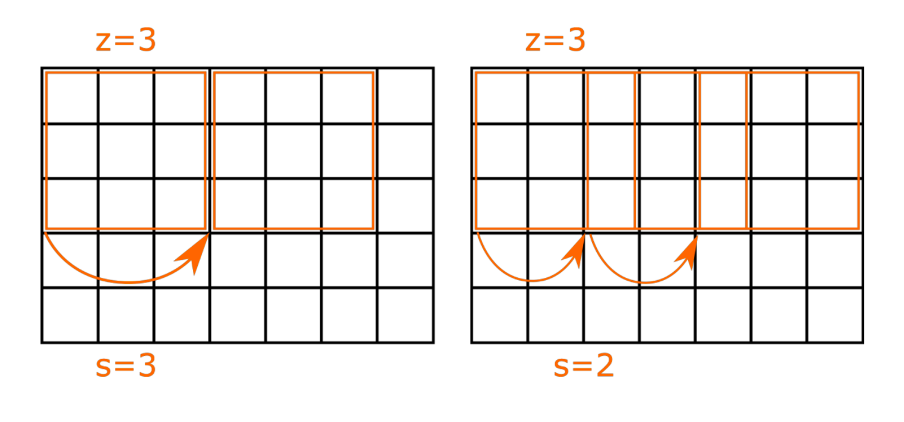

<h3>Max Pooling in Code</h3>

<h2>Explanation of the Code</h2>
<h3>1. Class Initialization:</h3>
<ul>
    <li>
        The <code>__init__</code> method accepts the following parameters:
        <ul>
            <li><strong>pool_size:</strong> The height and width of the pooling window (typically 2x2 or 3x3).</li>
            <li><strong>stride:</strong> The step size to move the window. If not provided, it defaults to the same as the <code>pool_size</code>.</li>
            <li><strong>padding:</strong> Whether to apply padding ('same') for zero-padding or 'valid' for (no padding).</li>
        </ul>
    </li>
</ul>

<h3>2. Padding:</h3>
<ul>
    <li>
        If padding is needed (<code>'same'</code>), we compute the required amount of padding for both height and width based on the pooling window size and apply zero-padding to the image.
    </li>
</ul>

<h2>3. Forward Pass (Pooling Operation):</h2>
<ul>
    <li>
        We iterate over each position in the output tensor and extract a region of the input tensor based on the pooling window size and stride.
        </li>
        <li>
            The maximum value within each region is recorded in the output tensor.
        </li>
    </ul>

<h3>4. Example Usage:</h3>
<ul>
    <li>
        We simulate a 55×55 image with 96 channels, replicating the 1st pooling layer of AlexNet, and apply a <code>MaxPooling2D</code> layer with a 3x3 pooling window and stride of 2.
    </li>
    <li>
        This results in down-sampling the image to a smaller size.
    </li>
</ul>

<h3>Key Differences from TensorFlow's MaxPooling2D</h3>
<ul>
    <li>
        <strong>Training & Inference Modes:</strong> This implementation does not have separate behavior for training and inference like some other layers (though max pooling typically doesn't change in inference).
    </li>
    <li>
        <strong>Batch Processing:</strong> The code currently processes one image at a time. To handle a batch of images, you'd extend this to loop over the batch dimension.
    </li>
    <li>
        <strong>Efficient Computation:</strong> This implementation is written for clarity and learning purposes, and it may not be as optimized as TensorFlow's <code>MaxPooling2D</code>, which is highly optimized and runs on GPU.
</li>
</ul>

<p>
    This custom implementation can be used for learning purposes or as part of a larger neural network framework.
</p>
</body>
</html>



</body>
</html>


In [7]:
import numpy as np

class MaxPooling2D:
    def __init__(self, pool_size=(2, 2), stride=None, padding='valid'):
        """
        Initializes the MaxPooling2D layer.
        
        Parameters:
        - pool_size (tuple): Size of the pooling window (height, width).
        - stride (int or tuple): Step size for moving the pooling window.
        - padding (str): 'valid' (no padding) or 'same' (zero padding).
        """
        self.pool_size = pool_size
        self.stride = stride if stride is not None else pool_size  # Default to pool_size if stride is None
        self.padding = padding

    def apply_padding(self, image, pad_h, pad_w):
        """
        Pads the input image with zeros if necessary.
        
        Parameters:
        - image (np.array): The input image.
        - pad_h (int): Padding height.
        - pad_w (int): Padding width.
        
        Returns:
        - np.array: Padded image.
        """
        return np.pad(image, ((pad_h, pad_h), (pad_w, pad_w), (0, 0)), mode='constant', constant_values=0)

    def forward(self, image):
        """
        Performs the max pooling operation.
        
        Parameters:
        - image (np.array): Input image with shape (height, width, channels).
        
        Returns:
        - np.array: The pooled image.
        """
        # Image dimensions
        image_height, image_width, channels = image.shape
        pool_height, pool_width = self.pool_size

        # Padding if necessary
        if self.padding == 'same':
            pad_h = (pool_height - 1) // 2
            pad_w = (pool_width - 1) // 2
            image = self.apply_padding(image, pad_h, pad_w)
        elif self.padding == 'valid':
            pad_h, pad_w = 0, 0

        # Calculate output dimensions
        output_height = (image.shape[0] - pool_height) // self.stride[0] + 1
        output_width = (image.shape[1] - pool_width) // self.stride[1] + 1
        
        # Initialize the output array
        pooled_output = np.zeros((output_height, output_width, channels))

        # Perform pooling operation
        for h in range(output_height):
            for w in range(output_width):
                for c in range(channels):
                    # Extract the region of interest (ROI) for the current filter position
                    region = image[
                        h * self.stride[0]: h * self.stride[0] + pool_height,
                        w * self.stride[1]: w * self.stride[1] + pool_width,
                        c
                    ]
                    # Apply max pooling to the region
                    pooled_output[h, w, c] = np.max(region)

        return pooled_output

# Example usage
# Simulated image with batch size of 1, height=6, width=6, and 1 channel
image = np.random.randn(55, 55, 96)

# Instantiate the MaxPooling2D layer with pool_size=(2, 2), stride=(2, 2), and 'valid' padding
#max_pool = MaxPooling2D(pool_size=(2, 2), stride=(2, 2), padding='valid')
max_pool= MaxPooling2D(pool_size=(3,3), stride=(2,2), padding='valid')


# Apply the max pooling operation to the image
output = max_pool.forward(image)
print("Input Shape:\n",image.shape)
print("Output Shape of MaxPooling2D:\n", output.shape)


Input Shape:
 (55, 55, 96)
Output Shape of MaxPooling2D:
 (27, 27, 96)


<h2>Fully Connected Layers</h2>
<p>Fully connected (FC) layers are crucial components of Convolutional Neural Networks (CNNs), connecting every neuron in one layer to the next. Unlike convolutional and pooling layers, which collect spatial features, fully connected layers combine all previously learned features to create final predictions.</p>
<p>AlexNet's final layers are completely connected and incorporate high-level information obtained in previous convolutional layers. These layers enable complicated decision-making by combining all feature maps and assigning them to specified classes.</p>

<h2>SoftMax Layer</h2>
<p> The softmax layer, often the final layer in CNNs for classification tasks, converts output values from the previous layer into probabilities for each class. It’s defined by the formula:</p>

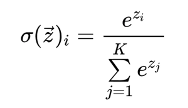
 
where zi represents the input score for each class.
In AlexNet, the softmax layer assigns probabilities to each class, allowing the network to make a clear prediction by identifying the class with the highest probability. This final step turns high-level features into an interpretable output, guiding the model to its classification decision.


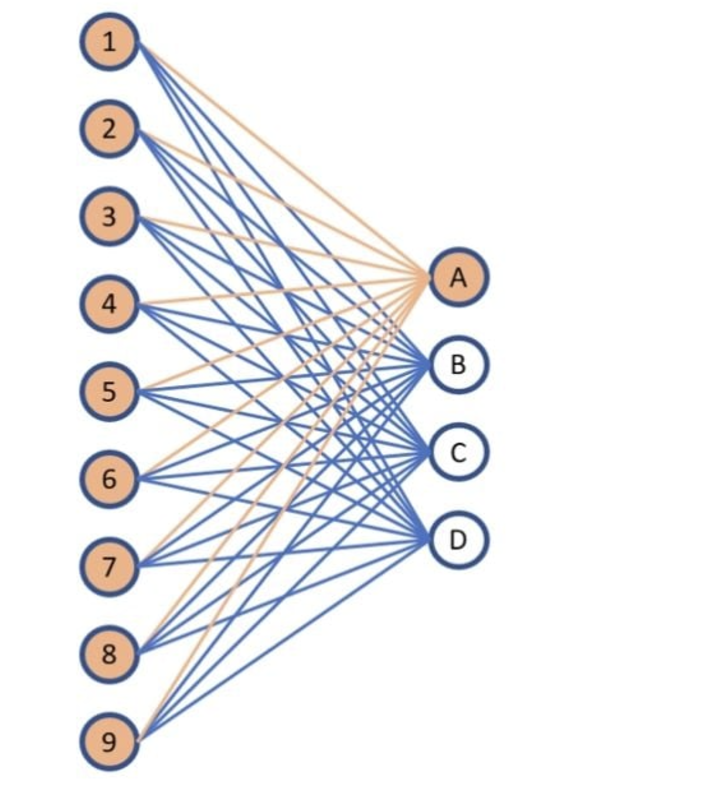

<h3>Fully Connected in Code</h3>
<h3>Explanation of the Code</h3>

<h4>Class Initialization:</h4>
<ul>
    <li>The <code>__init__</code> method sets up the Dense layer with the given number of input and output features, preparing the layer for use.</li>
</ul>

<h4>Parameter Initialization:</h4>
<ul>
    <li>The <code>initialize_params</code> method initializes weights with random values scaled for balanced activations and sets biases to zero.</li>
</ul>

<h4>Forward Pass (Computation):</h4>
<ul>
    <li>The <code>forward</code> method computes the output by performing a dot product of the input with the weights and adding the biases.</li>
</ul>

<h3>Key Points:</h3>
<ul>
    <li>Weights are initialized to ensure variance is maintained.</li>
    <li>Biases are initialized to zero.</li>
    <li>The forward pass transforms inputs to outputs through matrix multiplication and bias addition.</li>
</ul>

<p>This concise implementation illustrates the fundamental workings of a Dense layer, ideal for learning and understanding the basics. If you need more details or have any questions, feel free to ask! 😊</p>


In [8]:
class Dense:
    def __init__(self, in_features, out_features):
        """
        Initializes the Dense (fully connected) layer.
        
        Parameters:
        - input_size (int): Number of input features.
        - output_size (int): Number of output features.
        """
        self.input_size = in_features
        self.output_size = out_features
        self.weights = None
        self.biases = None
        self.initialize_params()

    def initialize_params(self):
        """
        Initializes weights and biases with random values.
        
        Weights are initialized using a normal distribution.
        Biases are initialized to zeros.
        """
        self.weights = np.random.randn(self.input_size, self.output_size) * np.sqrt(2. / self.input_size)
        self.biases = np.zeros((1, self.output_size))

    def forward(self, input_data):
        """
        Performs the forward pass of the Dense layer.
        
        Parameters:
        - input_data (np.array): Input data with shape (batch_size, input_size).
        
        Returns:
        - np.array: Output of the dense layer with shape (batch_size, output_size).
        """
        return np.dot(input_data, self.weights) + self.biases



## Local Response Normalization

<p><strong>Local Response Normalization (LRN):</strong> Local Response Normalization (LRN) is a technique used to normalize the activations of neurons in a neural network by considering the activities of neighboring neurons within the same layer. Typically applied after the ReLU activation, LRN encourages competition among neurons, preventing any single neuron from dominating and promoting more balanced feature learning. This regularization helps improve generalization, making the network less likely to overfit and better able to handle unseen data. In practice, LRN has been shown to boost performance, as seen in AlexNet, where it contributed to improved accuracy and reduced error rates. LRN is computationally intensive, so it is only applied to the first two convolutional layers in AlexNet to avoid a significant performance cost in deeper layers.</p>

<p>The formula for LRN is shown below:</p>

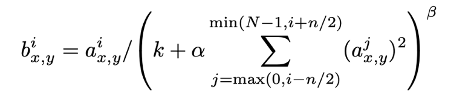

<p>where:</p>
<ul>
  <li><strong>b<sup>i</sup><sub>x,y</sub></strong>: The normalized activity of the neuron at position (x, y) in the ith channel.</li>
  <li><strong>a<sup>i</sup><sub>x,y</sub></strong>: The original activity of the neuron before normalization.</li>
  <li><strong>j</strong>: Index of the neighboring neurons.</li>
  <li><strong>k, α, β and n</strong> are Hyperparameters of the normalization. For AlexNet these are set as: k = 2, α=10<sup>-4</sup>, β=0.75, n=5</li>
</ul>

<p>To better understand Local Response Normalization (LRN), let’s consider an example: Suppose we have 3 feature maps (or channels) from a convolutional layer, each containing 4x4 activations at a certain spatial position in an image. We’ll focus on the same position across all feature maps, as LRN normalizes a neuron's value by considering the activations of its neighbors in other feature maps at the same spatial location.</p>

<p><strong>Improvements:</strong> In AlexNet, applying LRN resulted in:</p>
<ul>
  <li>1.4% improvement in top 1 error rate.</li>
  <li>1.2% improvement in top 5 error rate.</li>
</ul>

<p>These improvements indicate better generalization and accuracy on the validation set due to the normalization effect.</p>


In [9]:
import numpy as np

class custom_LocalResponseNormalization:
    def __init__(self, depth_radius=5, bias=1.0, alpha=1e-4, beta=0.75):
        """
        Initializes the LocalResponseNormalization layer.

        Parameters:
        - depth_radius (int): Number of neighboring channels for normalization.
        - bias (float): Added to the normalization term to avoid division by zero.
        - alpha (float): Scaling parameter.
        - beta (float): Exponent for normalization.
        """
        self.depth_radius = depth_radius
        self.bias = bias
        self.alpha = alpha
        self.beta = beta

    def forward(self, X):
        """
        Applies local response normalization to the input data.

        Parameters:
        - X (np.array): Input data with shape (height, width, channels).

        Returns:
        - np.array: The normalized data.
        """
        H, W, C = X.shape  # height, width, channels
        squared_input = np.square(X)
        output = np.zeros_like(X)

        for h in range(H):  # Iterate over height
            for w in range(W):  # Iterate over width
                for c in range(C):  # Iterate over channels
                    # Define the start and end of the depth radius range
                    start = max(0, c - self.depth_radius // 2)
                    end = min(C, c + self.depth_radius // 2 + 1)

                    # Sum the square of inputs within the local region
                    local_sum = np.sum(squared_input[h, w, start:end], axis=0)
                    
                    # Apply LRN formula
                    scale = self.bias + (self.alpha * local_sum)
                    output[h, w, c] = X[h, w, c] / (scale ** self.beta)

        return output




<h2>Dropout</h2>
<p>With around 60 million parameters to train, the authors of AlexNet also explored additional methods to combat overfitting, one of which was the dropout technique introduced by G.E. Hinton in 2012. In dropout, each neuron has a 50% chance of being temporarily removed from the network during training, meaning it won't contribute to either the forward or backward propagation. This ensures that each input is processed by a slightly different network configuration, making the learned weight parameters more robust and less prone to overfitting.</p>
<p>During testing, dropout is not used, and the entire network is active, but the outputs are scaled down by a factor of 0.5 to compensate for the neurons that were dropped during training. Although dropout doubles the number of iterations needed for the network to converge, it prevents AlexNet from overfitting significantly.</p>

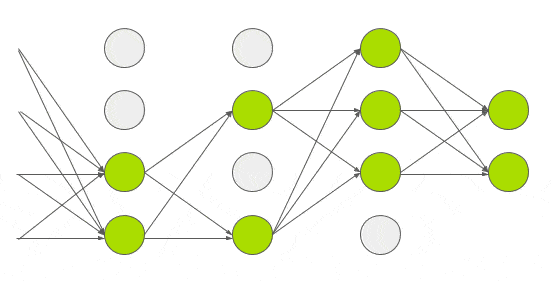

## Building Layers

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<title>AlexNet Overview</title>

</head>
<body>

<h3>Input</h3>
<p>In AlexNet, minimal pre-processing is applied to the input images: each pixel’s value is adjusted by subtracting the mean pixel activity across the entire training set, centering the pixel values and aiding model training. While the standard input image size for AlexNet is generally 224x224x3 (height, width, and color channels), an input size of 227x227x3 is used in calculations to simplify the output feature map dimensions in the first convolutional layer.</p>

<h3>First Convolutional Layer</h3>
<ul>
    <li>Filter (Kernel) Size: 11 x 11</li>
    <li>Stride: 4</li>
    <li>Number of Filters: 96</li>
    <li>Padding: No padding</li>
</ul>
<p>In convolutional layers, each filter (or kernel) slides across the input image, computing dot products between the filter values and the image pixel values in the area the filter covers. This produces an output feature map where each "pixel" represents a feature detected in that region.</p>

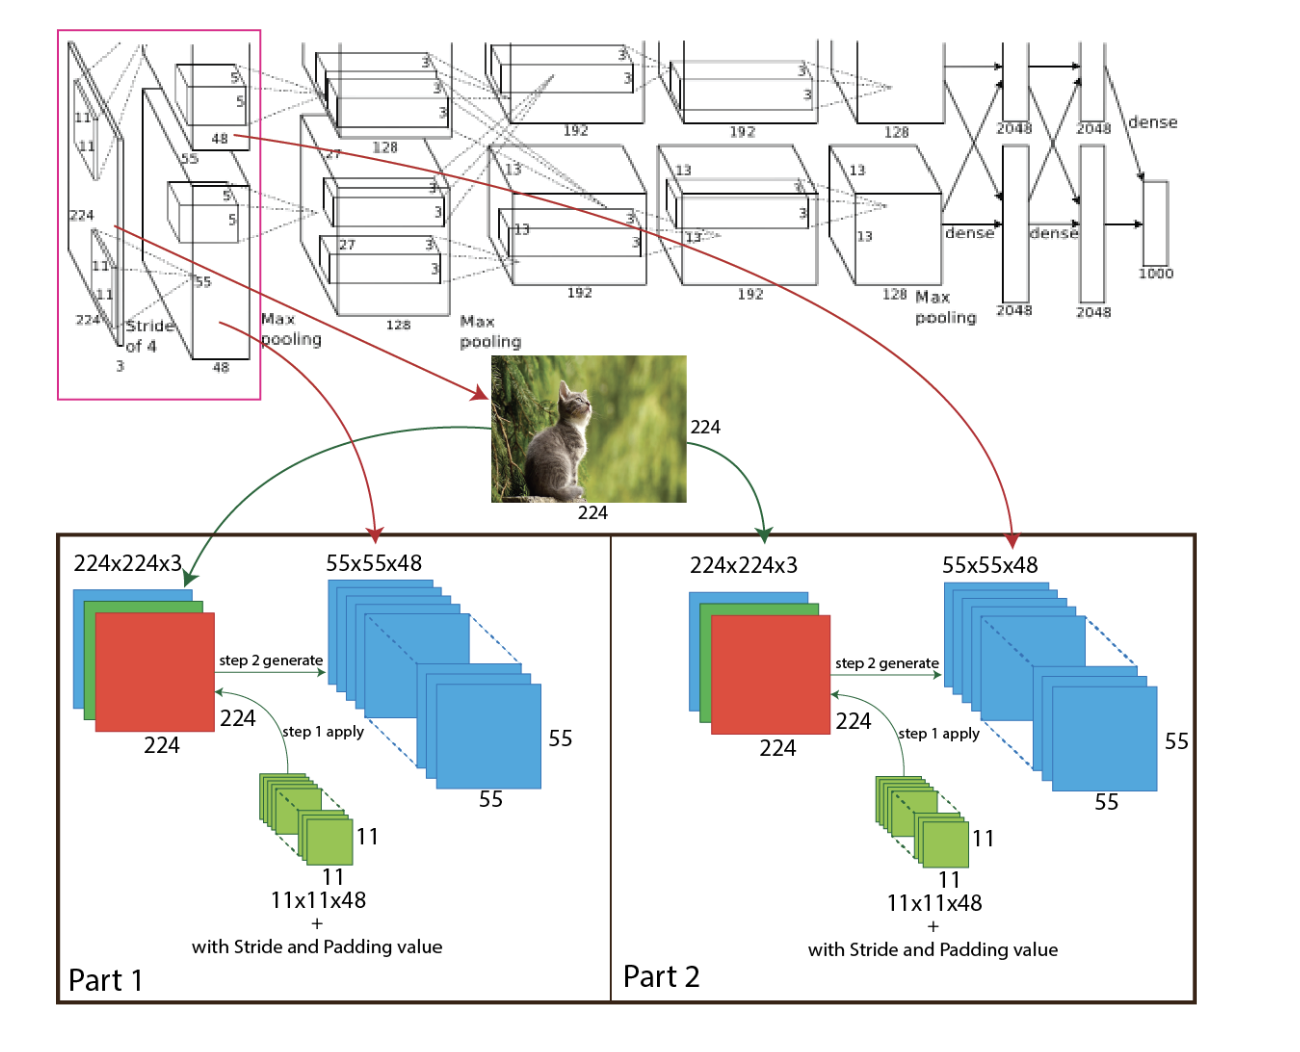

<h3>Output Dimension Calculation</h3>
<p>The formula for calculating the output dimension (<code>Wout</code>, <code>Hout</code>) of a convolutional layer:</p>
<pre>
    Wout = ((Win + 2P - K) / S) + 1
    Hout = ((Hin + 2P - K) / S) + 1
</pre>
<p>Plugging in AlexNet’s values:</p>
<ul>
    <li>Win = 227</li>
    <li>Hin = 227</li>
    <li>K = 11</li>
    <li>S = 4</li>
    <li>P = 0</li>
</ul>
<p>Wout = ((227 + 2*0 - 11) / 4) + 1 = (216 / 4) + 1 = 55<br>
    Hout = ((227 + 2*0 - 11) / 4) + 1 = (216 / 4) + 1 = 55</p>
<p>Output feature map size: 55 x 55 x 96</p>

<h3>ReLU and LRN</h3>
<p>After each convolution in AlexNet, a ReLU activation function is applied element-wise, setting negative values to zero while keeping positive values unchanged. In this layer, ReLU is followed by Local Response Normalization (LRN), which normalizes activations across neighboring feature maps to improve generalization and reduce overfitting.</p>

<h3>Implementation</h3>

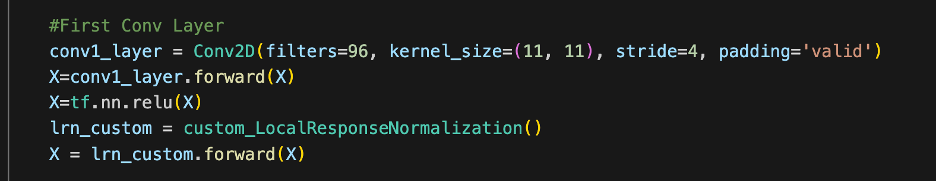

<h2>First Pooling Layer</h2>
<ul>
    <li>Kernel Size: 3 x 3</li>
    <li>Stride: 2</li>
    <li>Padding: No padding</li>
</ul>
<p>The input to this layer is the output from the first convolutional layer, which has dimensions 55 x 55 x 96.</p>

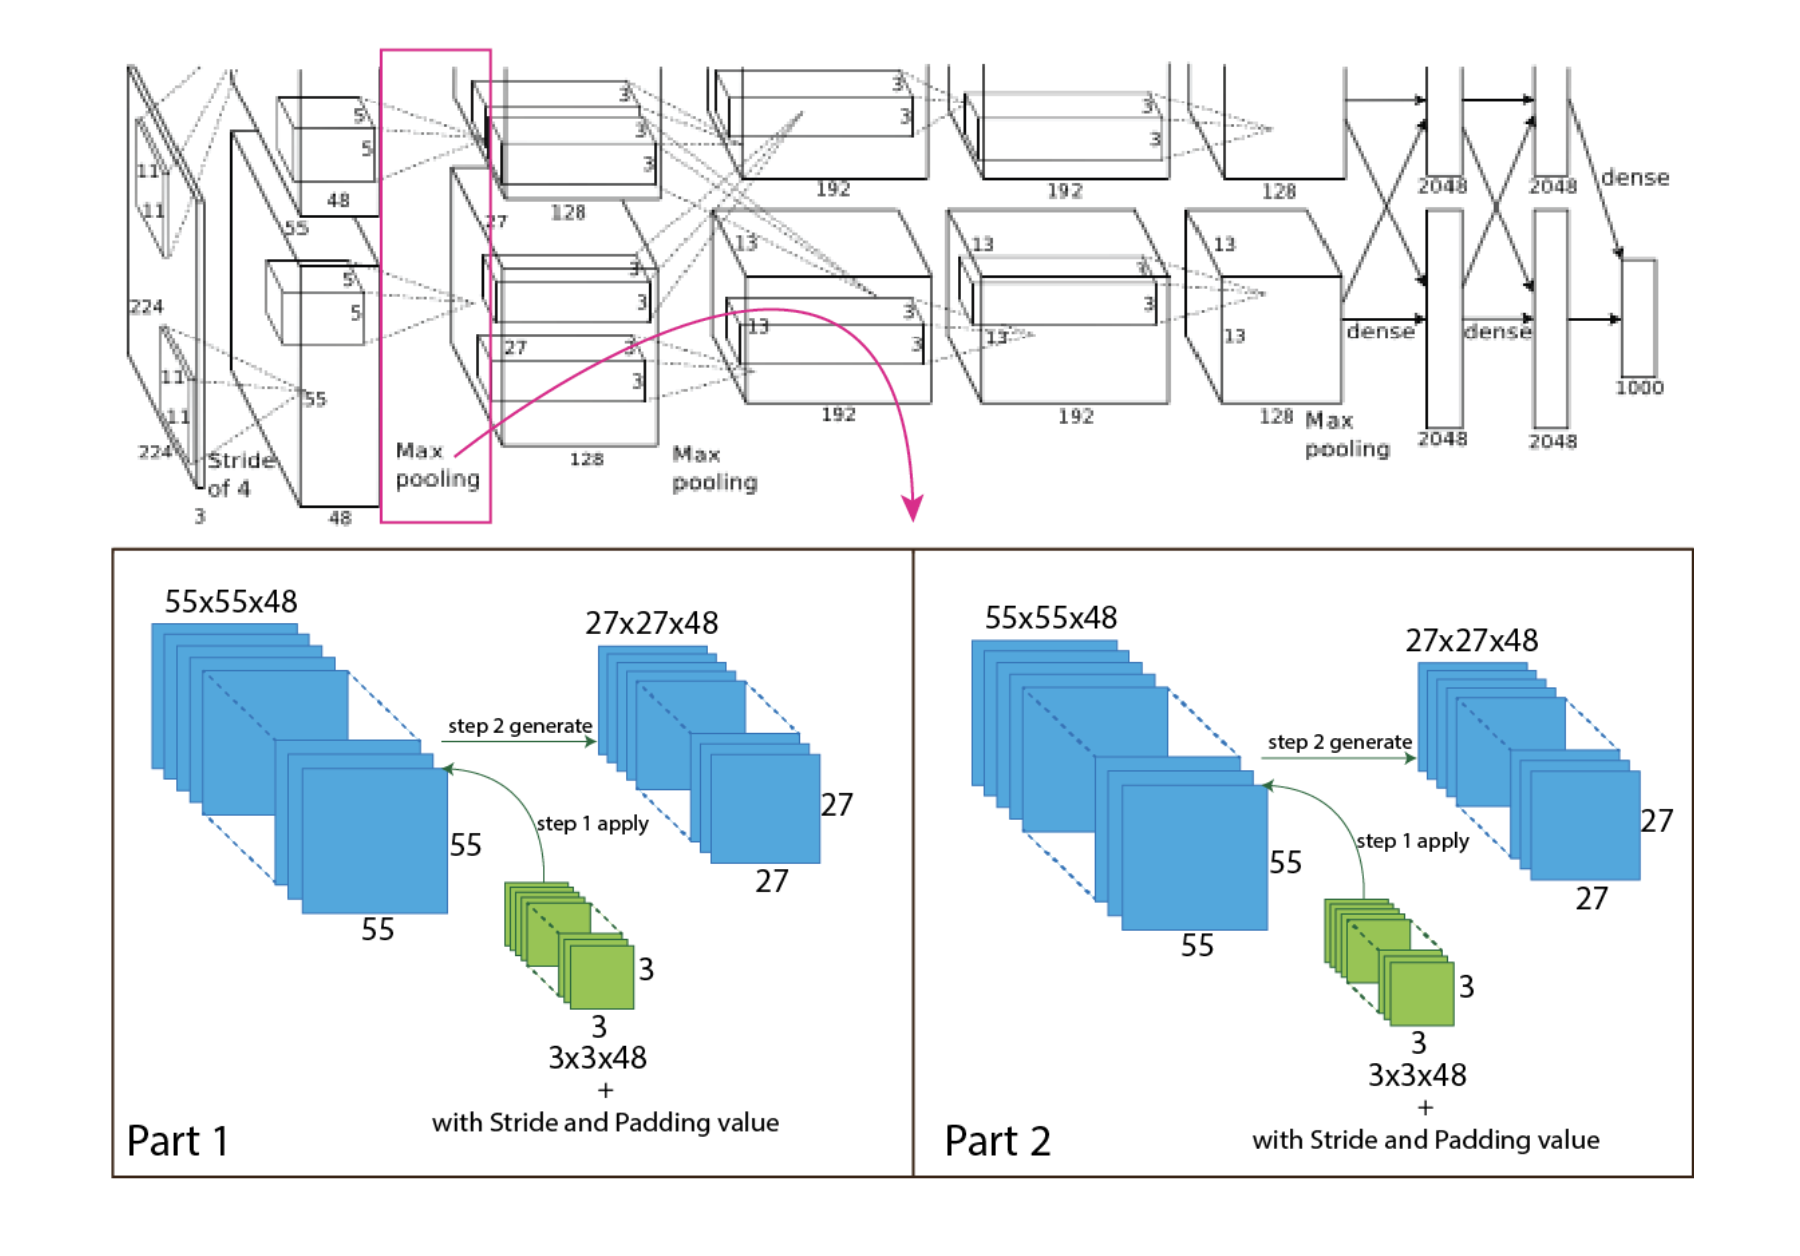

<h3>Output Dimension Calculation</h3>
<p>Plugging in values:</p>
<ul>
    <li>Win = 55</li>
    <li>Hin = 55</li>
    <li>K = 3</li>
    <li>S = 2</li>
    <li>P = 0</li>
</ul>
<p>Wout = ((55 + 2*0 - 3) / 2) + 1 = 27<br>
    Hout = ((55 + 2*0 - 3) / 2) + 1 = 27</p>
<p>Output feature map size: 27 x 27 x 96</p>

<h3>Implementation</h3>

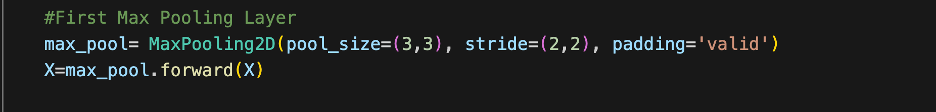

<h2>Second Convolutional Layer</h2>
<ul>
    <li>Filter (Kernel) Size: 5 x 5</li>
    <li>Stride: 1</li>
    <li>Number of Filters: 256</li>
    <li>Padding: 2 (Same padding)</li>
</ul>

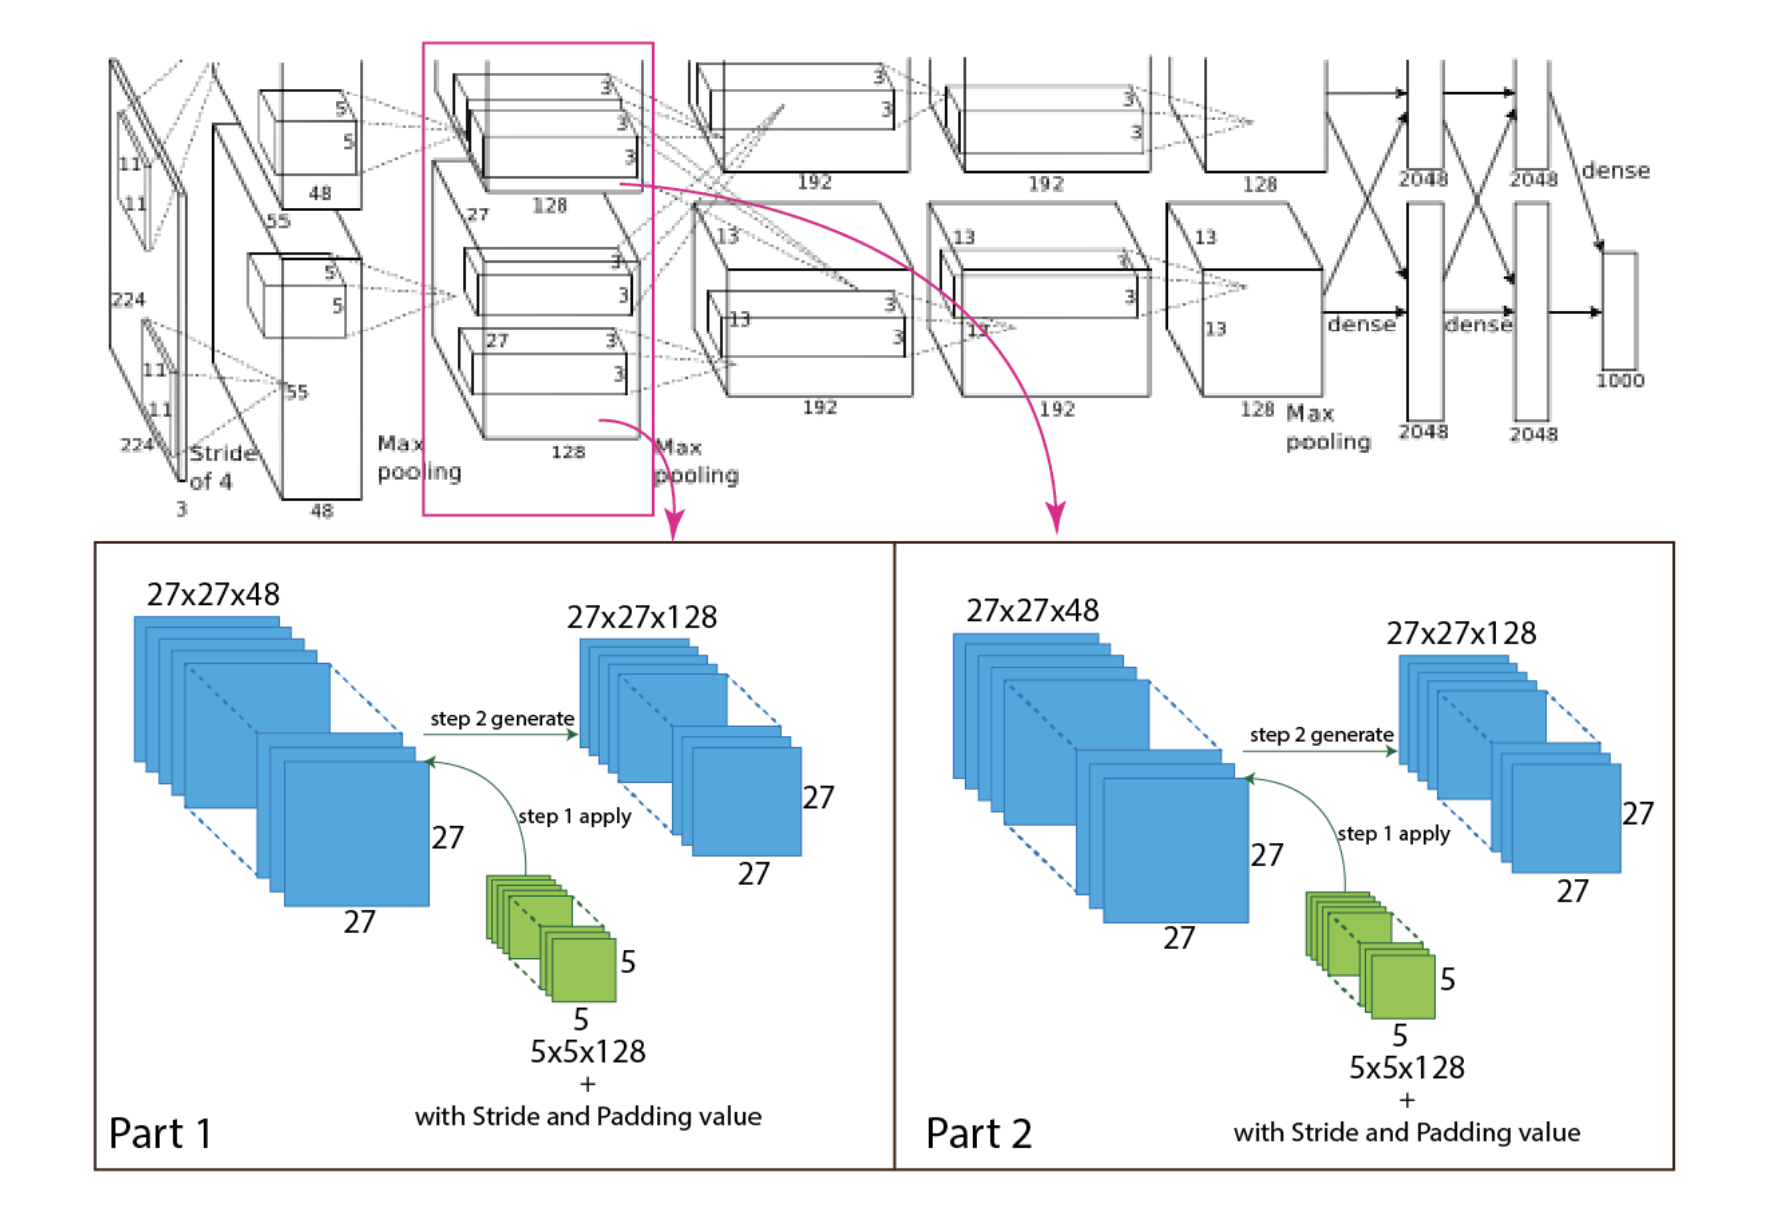
<h3>Output Dimension Calculation</h3>
<p>Plugging in values:</p>
<ul>
    <li>Win = 27</li>
    <li>Hin = 27</li>
    <li>K = 5</li>
    <li>S = 1</li>
    <li>P = 2</li>
</ul>
<p>Wout = ((27 + 2*2 - 5) / 1) + 1 = 27<br>
    Hout = ((27 + 2*2 - 5) / 1) + 1 = 27</p>
<p>Output feature map size: 27 x 27 x 256</p>

<h2>Activation Function and LRN</h2>
<p>Similar to the first convolutional layer, a ReLU activation function is applied element-wise. Following this, Local Response Normalization (LRN) is applied to normalize activations across neighboring feature maps.</p>

<h3>Implementation</h3>

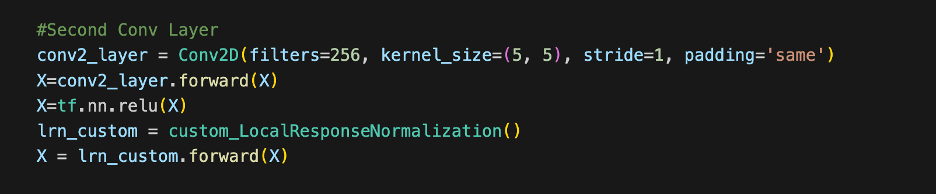

<h2>Second Max Pooling Layer</h2>
<ul>
    <li>Kernel Size: 3 x 3</li>
    <li>Stride: 2</li>
    <li>Padding: No padding</li>
</ul>

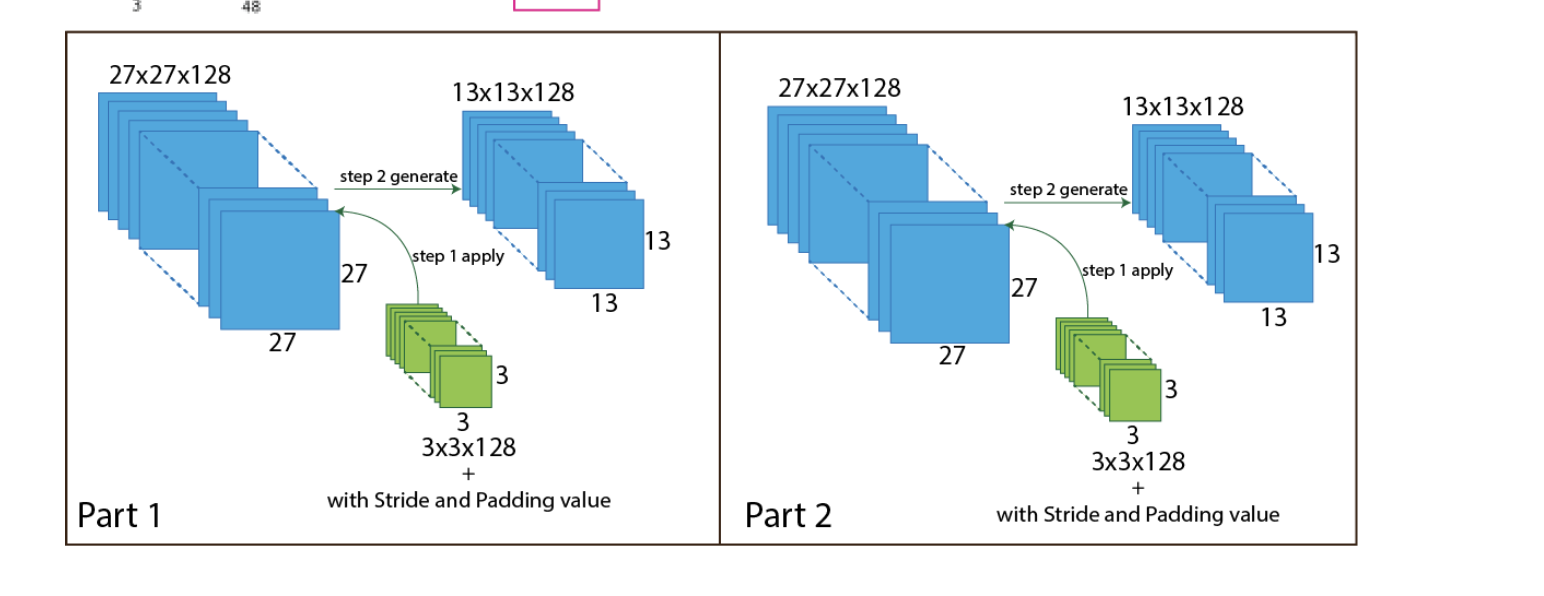
<h3>Output Dimension Calculation</h3>
<p>Plugging in values:</p>
<ul>
    <li>Win = 27</li>
    <li>Hin = 27</li>
    <li>K = 3</li>
    <li>S = 2</li>
    <li>P = 0</li>
</ul>
<p>Wout = ((27 + 2*0 - 3) / 2) + 1 = 13<br>
    Hout = ((27 + 2*0 - 3) / 2) + 1 = 13</p>
<p>This gives us an output feature map size of 13 x 13 for each filter. Since there are 256 filters in the second Max Pooling Layer the output shape of the second pooling layer is 13 x 13 x 256.</p>

<h2>ReLU and LRN</h2>
<p>
Similar to the first pooling layer, no activation function is applied here, as pooling’s role is primarily down-sampling. Local Response Normalization (LRN) is not used after this pooling layer, as it was only applied in specific layers earlier in the AlexNet architecture.
</p>

<h3>Implementation</h3>

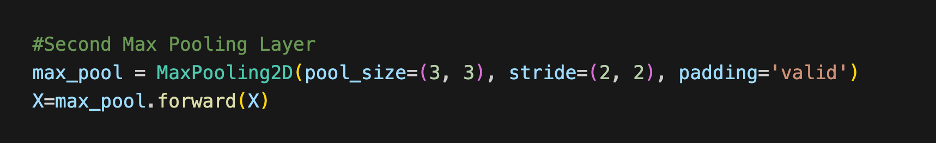

<h3>Third Convolutional Layer</h3>
<ul>
    <li>Filter (Kernel) Size: 3 x 3</li>
    <li>Stride: 1</li>
    <li>Number of Filters: 384</li>
    <li>Padding: 1 (Same padding)</li>
</ul>

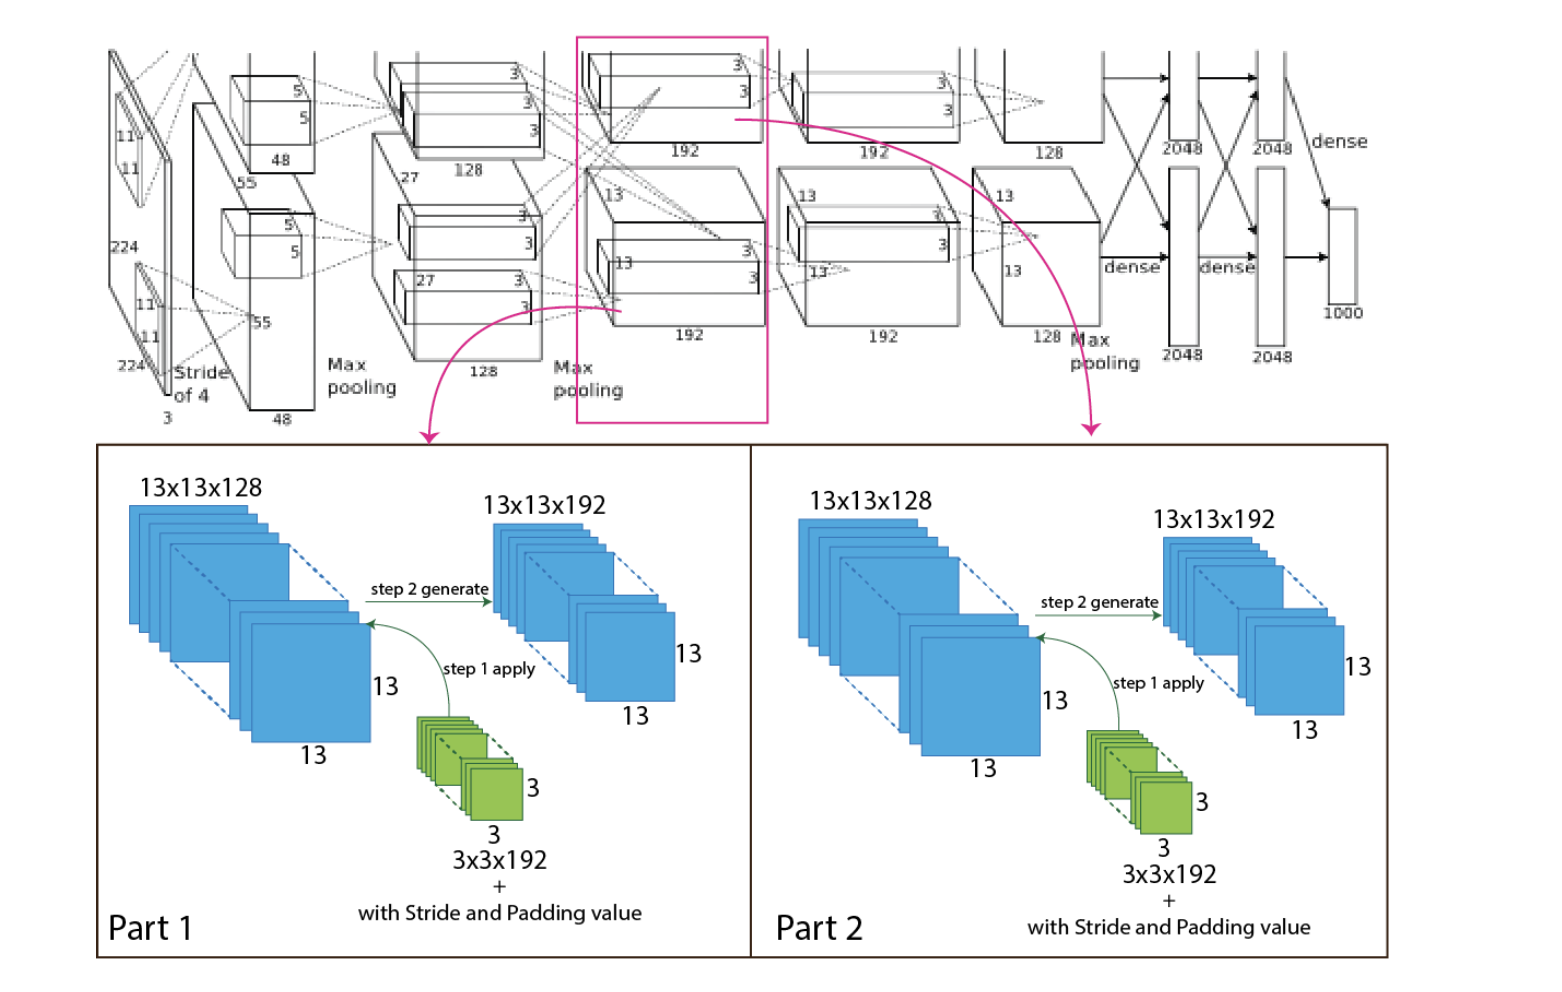
<h3>Output Dimension Calculation</h3>
<p>Plugging in values:</p>
<ul>
    <li>Win = 13</li>
    <li>Hin = 13</li>
    <li>K = 3</li>
    <li>S = 1</li>
    <li>P = 1</li>
</ul>
<p>Wout = ((13 + 2*1 - 3) / 1) + 1 = 13<br>
    Hout = ((13 + 2*1 - 3) / 1) + 1 = 13</p>
<p>This results in an output feature map size of 13 x 13 for each filter.
Since there are 384 filters in this layer, the output shape of the third convolutional layer is 13 x 13 x 384.</p>

<h3>Activation Function and LRM</h3>
<p>
In this layer, the ReLU activation function is applied after convolution, while Local Response Normalization (LRN) is not utilized.
</p>

<h3>Implementation</h3>

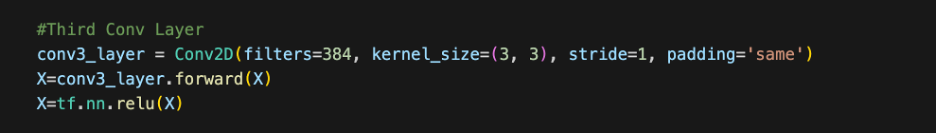

<h2>Fourth Convolutional Layer</h2>
<p>The fourth convolutional layer in AlexNet takes the output feature map from the third convolutional layer as its input. The parameters for this layer are:</p>

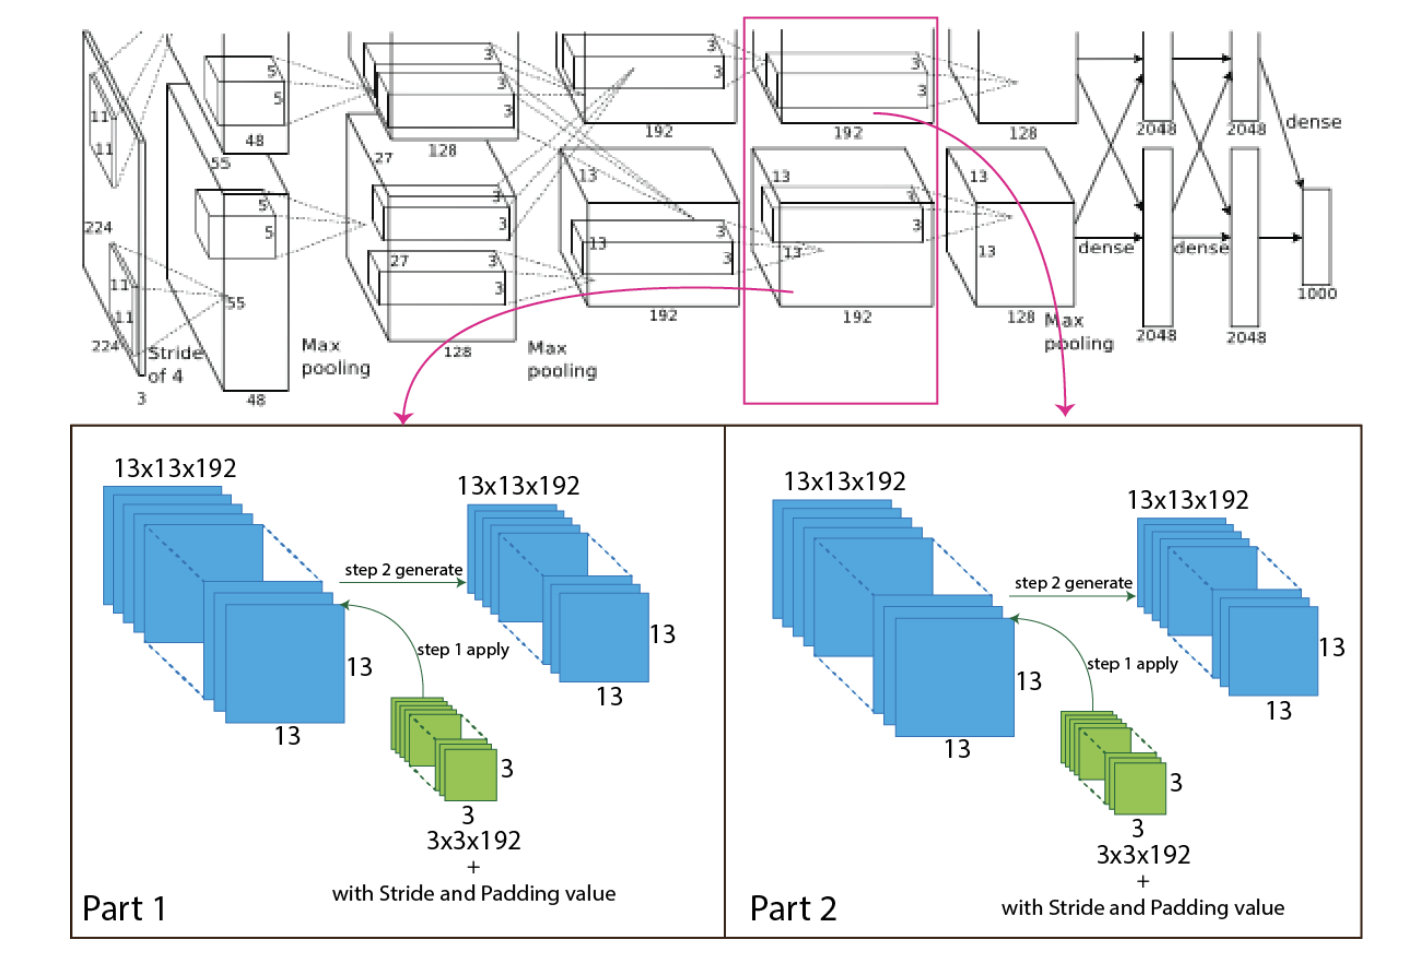
<ul>
    <li>Filter (Kernel) Size: 3 x 3</li>
    <li>Stride: 1</li>
    <li>Number of Filters: 384</li>
    <li>Padding: 1 (Same padding)</li>
</ul>
<h3>Operation</h3>
<p>In this layer, each of the 384 filters (3 x 3 x 384) slides over the feature map produced by the third convolutional layer (13 x 13 x 384). With a padding of 1, the spatial dimensions remain the same as the input, ensuring that the convolution covers the full feature map without any reduction in size.</p>

<h3>Output Dimension Calculation</h3>
<p><code>Wout = ((Win + 2P - K) / S) + 1</code><br>
<code>Hout = ((Hin + 2P - K) / S) + 1</code><br>
Plugging in values from the previous layer:</p>
<ul>
    <li>Win = 13</li>
    <li>Hin = 13</li>
    <li>K = 3</li>
    <li>S = 1</li>
    <li>P = 1</li>
</ul>
<p><code>Wout = ((13 + 2*1 - 3) / 1) + 1 = (12) + 1 = 13</code><br>
<code>Hout = ((13 + 2*1 - 3) / 1) + 1 = (12) + 1 = 13</code><br>
This results in an output feature map size of 13 x 13 for each filter.<br>
With 384 filters, the output shape of the fourth convolutional layer is 13 x 13 x 384.</p>

<h3>Activation Function and LRN</h3>
<p>Similar to the last layer, the ReLU activation function is applied after convolution, while Local Response Normalization (LRN) is not utilized.</p>

<h3>Implementation</h3>

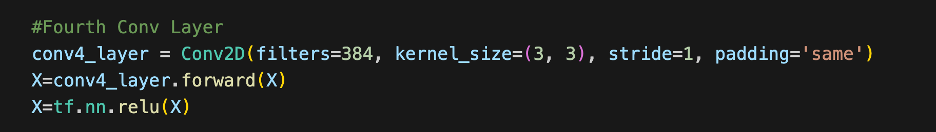

<h2>Fifth Convolutional Layer</h2>
<p>The fifth convolutional layer in AlexNet takes the output feature map from the fourth convolutional layer as input. The parameters for this layer are:</p>


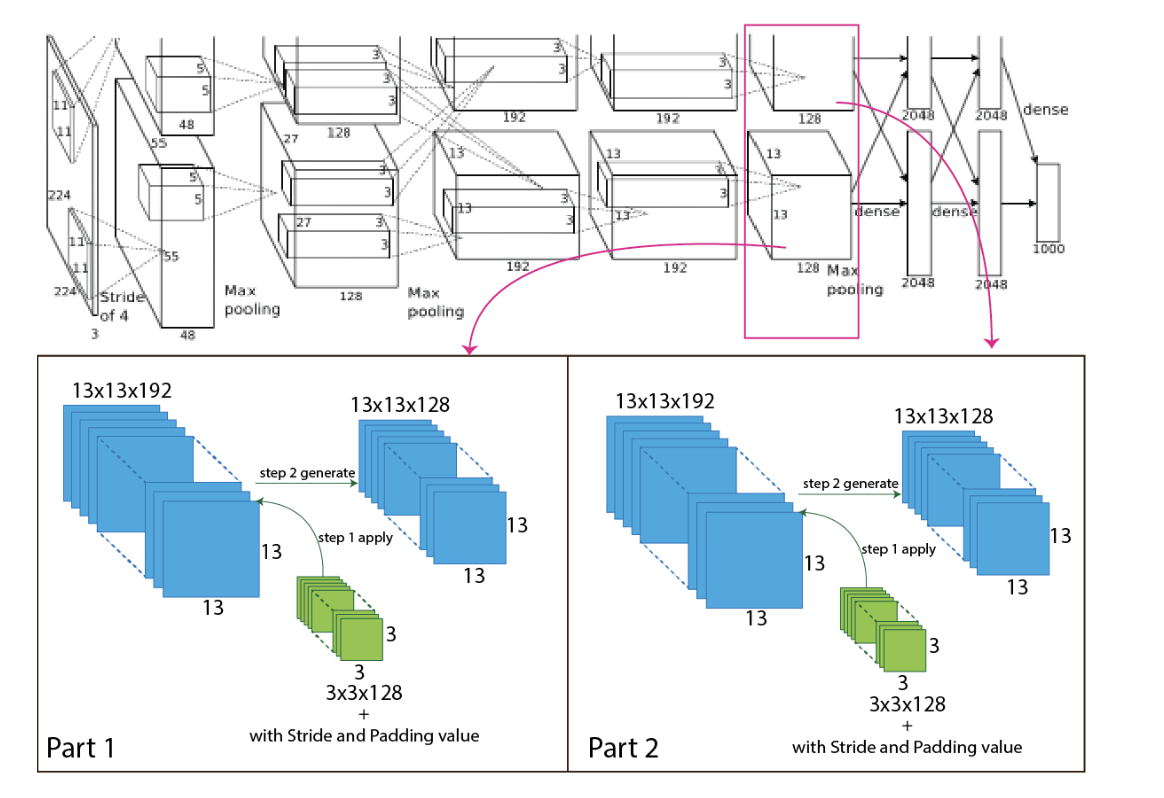
<ul>
    <li>Filter (Kernel) Size: 3 x 3</li>
    <li>Stride: 1</li>
    <li>Number of Filters: 256</li>
    <li>Padding: 1 (Same padding)</li>
</ul>
<h3>Operation</h3>
<p>In this layer, each of the 256 filters (3 x 3 x 384) slides over the feature map produced by the fourth convolutional layer (13 x 13 x 384). The padding of 1 keeps the spatial dimensions of the output feature map the same as the input, so the convolution covers the entire input feature map without reducing its size.</p>

<h3>Output Dimension Calculation</h3>
<p><code>Wout = ((Win + 2P - K) / S) + 1</code><br>
<code>Hout = ((Hin + 2P - K) / S) + 1</code><br>
Plugging in values from the previous layer:</p>
<ul>
    <li>Win = 13</li>
    <li>Hin = 13</li>
    <li>K = 3</li>
    <li>S = 1</li>
    <li>P = 1</li>
</ul>
<p><code>Wout = ((13 + 2*1 - 3) / 1) + 1 = (12) + 1 = 13</code><br>
<code>Hout = ((13 + 2*1 - 3) / 1) + 1 = (12) + 1 = 13</code><br>
This results in an output feature map size of 13 x 13 for each filter.<br>
Since there are 256 filters in this layer, the output shape of the fifth convolutional layer is 13 x 13 x 256.</p>

<h3>Activation Function and LRN</h3>
<p>Similar to the last two layers, the ReLU activation function is applied after convolution, while Local Response Normalization (LRN) is not utilized.</p>

<h3>Implementation</h3>

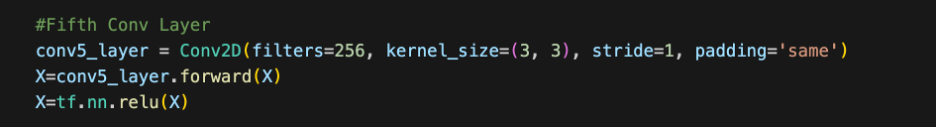

<h2>Third Pooling Layer</h2>
<p>The third pooling layer in AlexNet performs max pooling on the feature map produced by the fifth convolutional layer to further reduce spatial dimensions while retaining essential features. The parameters for this pooling layer are:</p>

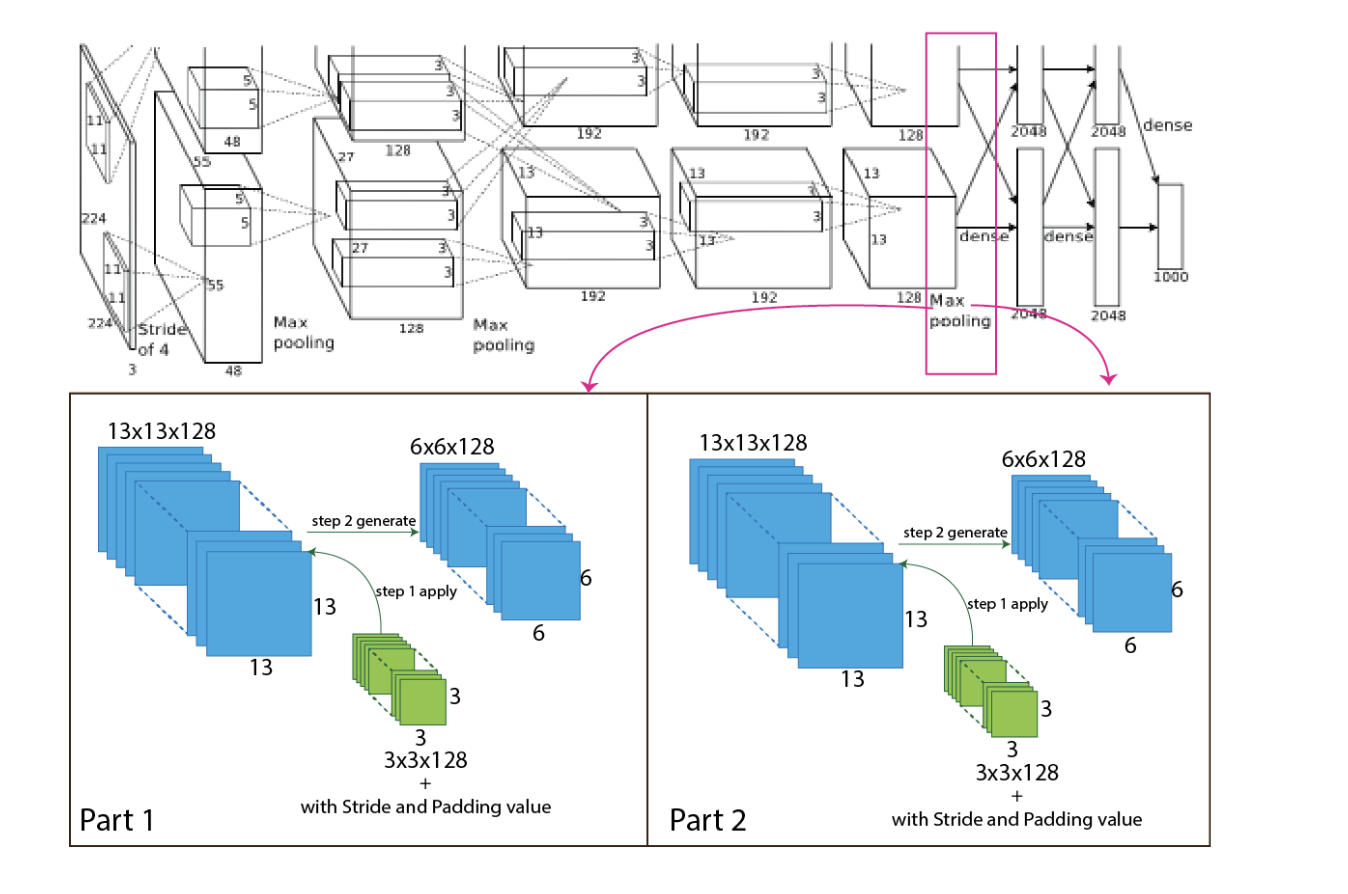
<ul>
    <li>Kernel Size: 3 x 3</li>
    <li>Stride: 2</li>
    <li>Padding: No padding</li>
</ul>
<h3>Operation</h3>
<p>This layer applies a 3 x 3 max pooling filter to the input feature map (13 x 13 x 256) with a stride of 2. The filter slides over the input, selecting the maximum value from each 3 x 3 region, which reduces the spatial dimensions while preserving important features.</p>

<h3>Output Dimension Calculation</h3>
<p><code>Wout = ((Win + 2P - K) / S) + 1</code><br>
<code>Hout = ((Hin + 2P - K) / S) + 1</code><br>
Plugging in values from the previous layer:</p>
<ul>
    <li>Win = 13</li>
    <li>Hin = 13</li>
    <li>K = 3</li>
    <li>S = 2</li>
    <li>P = 0</li>
</ul>
<p><code>Wout = ((13 + 2*0 - 3) / 2) + 1 = (5) + 1 = 6</code><br>
<code>Hout = ((13 + 2*0 - 3) / 2) + 1 = (5) + 1 = 6</code><br>
This results in an output feature map size of 6 x 6 for each filter.<br>
Since the number of channels (256) is preserved, the output shape of the third pooling layer is 6 x 6 x 256.</p>

<h3>Activation Function and LRN</h3>
<p>In this layer, no activation function or Local Response Normalization (LRN) is applied. The pooling layer’s sole purpose is to down-sample the feature map.</p>

<h3>Implementation</h3>

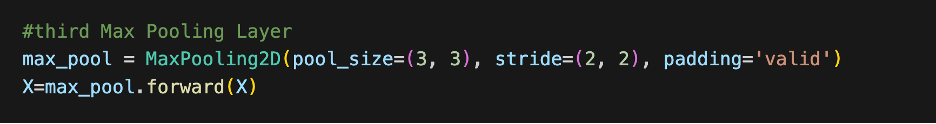

<h2>Fully Connected Layers</h2>
<p>The next fully connected layers in AlexNet take the flattened output from the final pooling layer (6 x 6 x 256) and transform it into a 1-dimensional vector. These layers are designed to perform high-level reasoning on the features extracted by the convolutional and pooling layers. The first fully connected layer has 4096 neurons, followed by another fully connected layer with 4096 neurons, and finally, a fully connected layer with 1000 neurons corresponding to the number of classes in the dataset. Each of these layers uses the ReLU activation function to introduce non-linearity.</p>

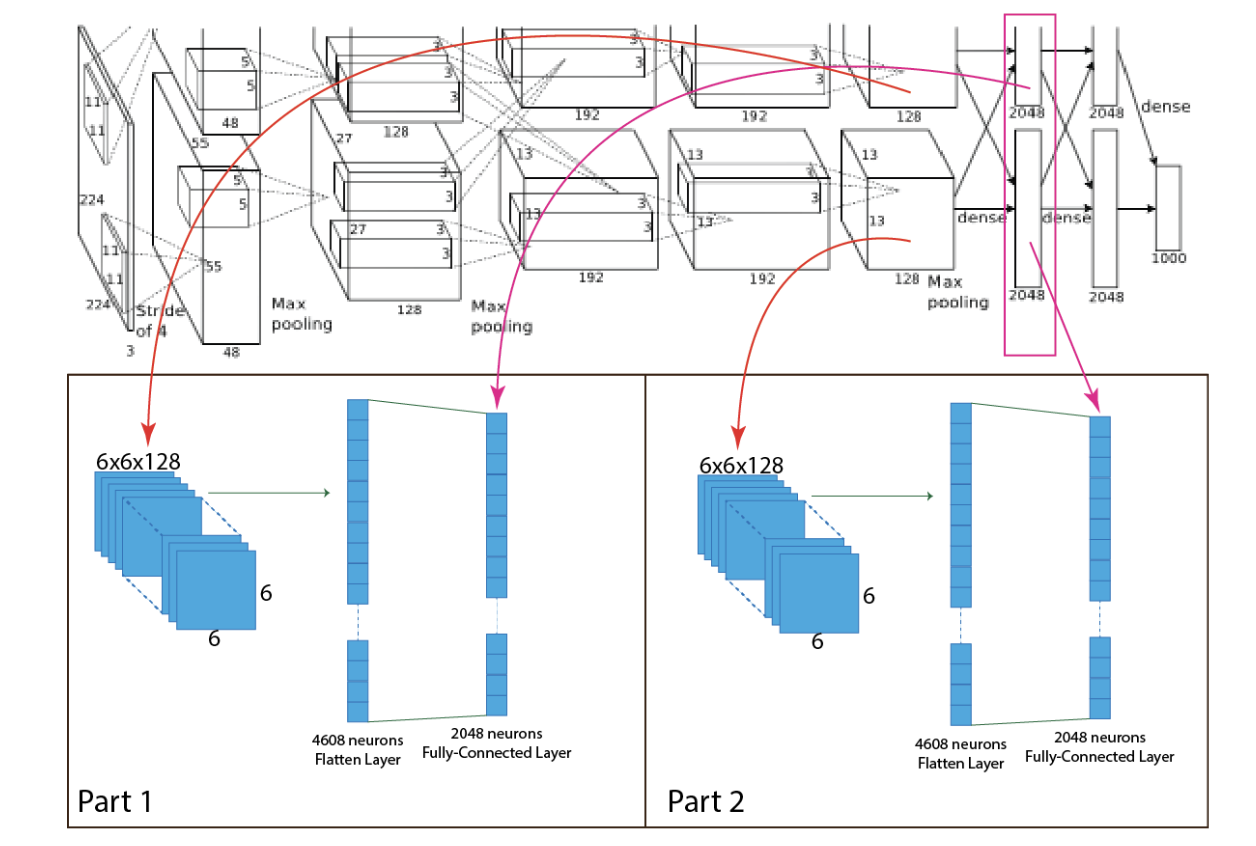

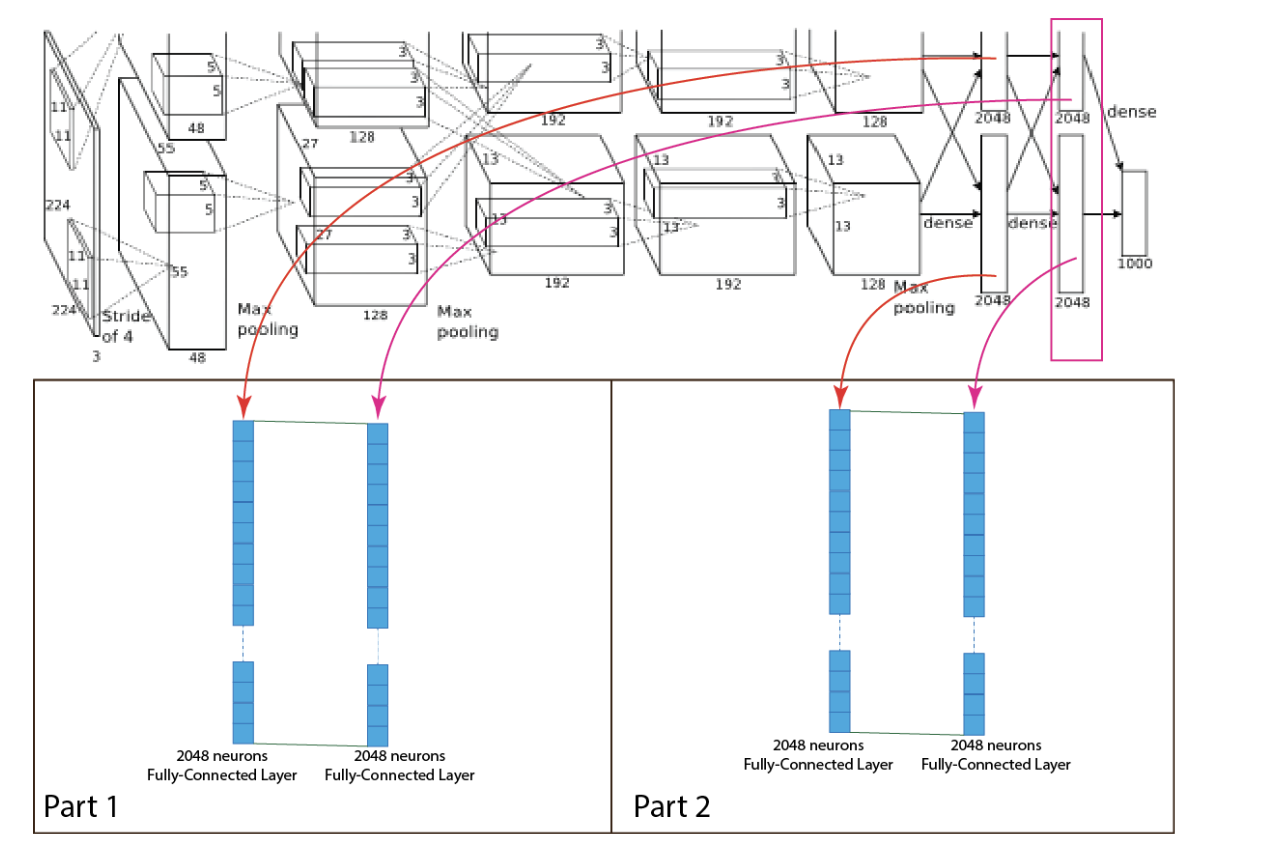


<p>To combat overfitting, the authors of AlexNet incorporated the dropout technique. In this method, each neuron has a 50% chance of being temporarily removed from the network during training. This means it won't contribute to either the forward or backward propagation, ensuring that each input is processed by a slightly different network configuration. This makes the learned weight parameters more robust and less prone to overfitting.</p>


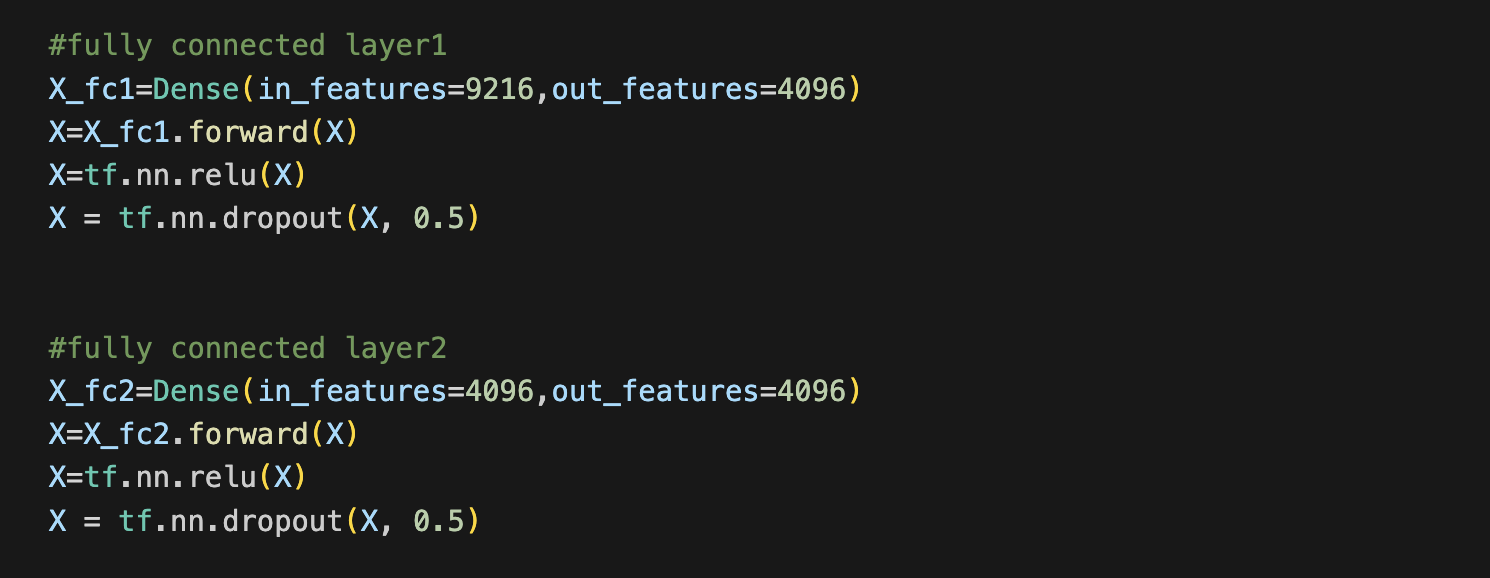



<h2>SoftMax Layer</h2>
<p> The final layer in the AlexNet architecture is a fully connected output layer, denoted as "y," which includes 1000 possible outputs using the softmax activation function. The network combines two fully connected layers, each with 2048 neurons, into a single fully connected layer with 4096 neurons. This connects directly to the output layer. The softmax function ensures that the sum of all output layer values ranges between 0 and 1. AlexNet uses a subset of the ImageNet dataset, featuring 1000 output neurons corresponding to classes labeled 0 through 999. To visualize this process, refer to the diagram provided below.</p>

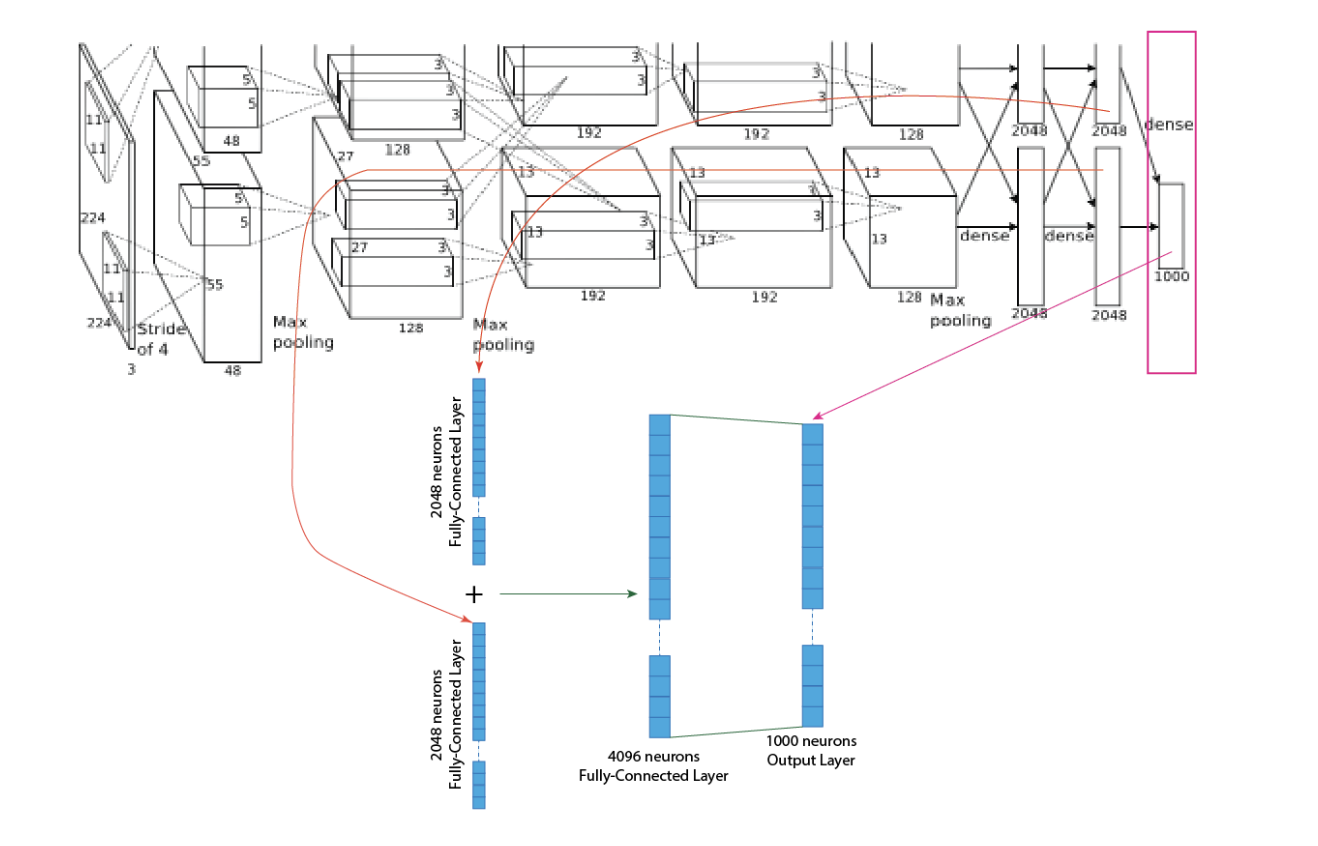

 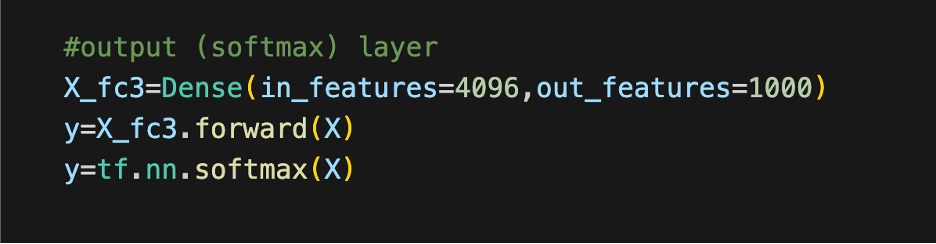
 

</body>
</html>


<h2>Sample Execution</h2>
<p>This sample code execution defines and runs the forward pass of an AlexNet-inspired model. It processes an input image of the same size as AlexNet (227x227x3) through multiple convolutional and pooling layers, followed by fully connected layers to generate class predictions. The model combines feature extraction and classification steps to output a probability distribution over 1000 classes.</p>



In [10]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import tensorflow as tf

# Apply ReLU activation in TensorFlow


class AlexNetModel:
    def __init__(self, input_shape=(224,224,3)):
        self.input_shape = input_shape
        #self.model = self.build_model()
        
    def forward(self,X):

        #First Conv Layer
        conv1_layer = Conv2D(filters=96, kernel_size=(11, 11), stride=4, padding='valid')
        X=conv1_layer.forward(X)
        X=tf.nn.relu(X) 
        lrn_custom = custom_LocalResponseNormalization()
        X = lrn_custom.forward(X)


        #First Max Pooling Layer
        max_pool= MaxPooling2D(pool_size=(3,3), stride=(2,2), padding='valid')
        X=max_pool.forward(X)


        #Second Conv Layer
        conv2_layer = Conv2D(filters=256, kernel_size=(5, 5), stride=1, padding='same')
        X=conv2_layer.forward(X)
        X=tf.nn.relu(X) 
        lrn_custom = custom_LocalResponseNormalization()
        X = lrn_custom.forward(X)


        #Second Max Pooling Layer
        max_pool = MaxPooling2D(pool_size=(3, 3), stride=(2, 2), padding='valid')
        X=max_pool.forward(X)


        #Third Conv Layer
        conv3_layer = Conv2D(filters=384, kernel_size=(3, 3), stride=1, padding='same')
        X=conv3_layer.forward(X)
        X=tf.nn.relu(X) 


        #Fourth Conv Layer
        conv4_layer = Conv2D(filters=384, kernel_size=(3, 3), stride=1, padding='same')
        X=conv4_layer.forward(X)
        X=tf.nn.relu(X) 

        #Fifth Conv Layer
        conv5_layer = Conv2D(filters=256, kernel_size=(3, 3), stride=1, padding='same')
        X=conv5_layer.forward(X)
        X=tf.nn.relu(X) 

        #third Max Pooling Layer
        max_pool = MaxPooling2D(pool_size=(3, 3), stride=(2, 2), padding='valid')
        X=max_pool.forward(X)

        X=X.flatten()  #flattening to make it compatible for fully connected layers


        #fully connected layer1
        X_fc1=Dense(in_features=9216,out_features=4096)        
        X=X_fc1.forward(X)
        X=tf.nn.relu(X)
        X = tf.nn.dropout(X, 0.5) 
        

        #fully connected layer2
        X_fc2=Dense(in_features=4096,out_features=4096)
        X=X_fc2.forward(X)
        X=tf.nn.relu(X)
        X = tf.nn.dropout(X, 0.5) 



        #output (softmax) layer
        X_fc3=Dense(in_features=4096,out_features=1000)
        y=X_fc3.forward(X)

        y=tf.nn.softmax(y)

        return y

    def summary(self):
        return self.model.summary()

# Instantiate the AlexNet model class and print the summary
X=np.random.randn(227,227,3)
alexnet = AlexNetModel()
y=alexnet.forward(X)
y.shape
#alexnet.summary()



TensorShape([1, 1000])